# Home Loan Approval/Denial

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

#### Auxiliary variables

In [2]:
filename_input = 'data-hdma-eastbay-2019-2022-preprocessed'
filename_output = 'data-hdma-eastbay-2019-2022-processed'
pos_label = "Approved"
neg_label = "Denied"

#### Auxiliary functions

In [9]:
def plot_success(df, col, xlabel, col_order=None, save=False):
    _, ax = plt.subplots(figsize=(6, 4))

    sns.countplot(df, x=col, hue="application_outcome", order=col_order, ax=ax)

    ax2 = ax.twinx()
    ct = pd.crosstab(df[col], df["application_outcome"], normalize="index")

    if col_order is None:
        ax2.scatter(ct.index.values, ct.loc[:, pos_label], c="k")
    else:
        ax2.plot(col_order, ct.loc[col_order, pos_label], c="k", marker="o")

    ax.tick_params(axis="x", labelrotation=15)
    ax.set_xlabel(xlabel)
    ax2.set_ylabel("Application success rate")
    ax2.set_ylim(ct.loc[:, pos_label].min() - 0.1, ct.loc[:, pos_label].max() + 0.2)
    # ax2.set_ylim(np.min([ct.loc[:, pos_label].min() - 0.1, 0.5]), np.max([ct.loc[:, pos_label].min() + 0.3, 1.4]))

    plt.tight_layout()
    if save:
        plt.savefig(f'images/analysis-{col}.png')
    plt.show()


def plot_success_numerical(df, col, xlabel, bins=5, q=False, save=False):
    _, ax = plt.subplots(figsize=(6, 4))

    tdf = df.copy()
    if q:
        tdf[col] = pd.qcut(df[col], q=bins)
    else:
        tdf[col] = pd.cut(df[col], bins=bins)
    sns.countplot(tdf, x=col, hue="application_outcome", ax=ax)

    ax2 = ax.twinx()
    ct = pd.crosstab(tdf[col], tdf["application_outcome"], normalize="index")

    ax2.scatter(ct.index.astype(str), ct.loc[:, pos_label].values, c="k")

    ax.tick_params(axis="x", labelrotation=15)
    ax.set_xlabel(xlabel)
    ax2.set_ylabel("Application success rate")
    # ax2.set_ylim(np.min([ct.loc[:, pos_label].values.min() - 0.1, 0.5]), 1.1)
    ax2.set_ylim(ct.loc[:, pos_label].min() - 0.1, ct.loc[:, pos_label].max() + 0.2)

    plt.tight_layout()
    if save:
        plt.savefig(f'images/analysis-{col}.png')
    plt.show()

#### Loading the pre-processed data

In [4]:
df = pd.read_csv(f"../../{filename_input}.csv", index_col=0)

## 2. Visualizing the data

### Feature distributions

In [5]:
df['application_outcome'].value_counts()

application_outcome
Approved    473318
Denied       75945
Name: count, dtype: int64

In [6]:
df_denial = df['denial_reason'].apply(lambda x: x.split(';')[0])
df_denial = df_denial[df_denial != "not_applicable"]
df_denial = df_denial.value_counts(normalize=True)

df_denial

denial_reason
Debt-to-income ratio             0.386003
Credit application incomplete    0.161117
Credit history                   0.144368
Other                            0.114385
Collateral                       0.103996
Unverifiable information         0.055172
Insufficient cash                0.023833
Employment history               0.010995
Mortgage insurance denied        0.000132
Name: proportion, dtype: float64

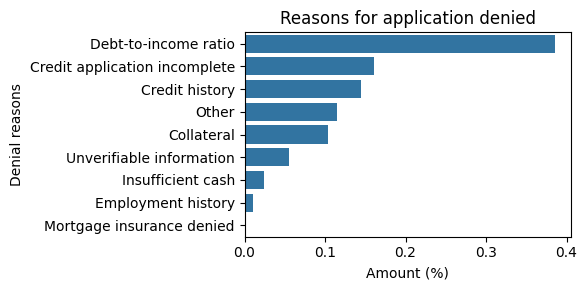

In [7]:
df_denial = df['denial_reason'].apply(lambda x: x.split(';')[0])
df_denial = df_denial[df_denial != "not_applicable"]
df_denial = df_denial.value_counts(normalize=True)

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(y=df_denial.index, x=df_denial.values,orient='h')

plt.title('Reasons for application denied')
plt.xlabel('Amount (%)')
plt.ylabel('Denial reasons')

plt.tick_params(axis='both')
plt.tight_layout()
plt.savefig('images/analysis-denial_reason.png')
plt.show()

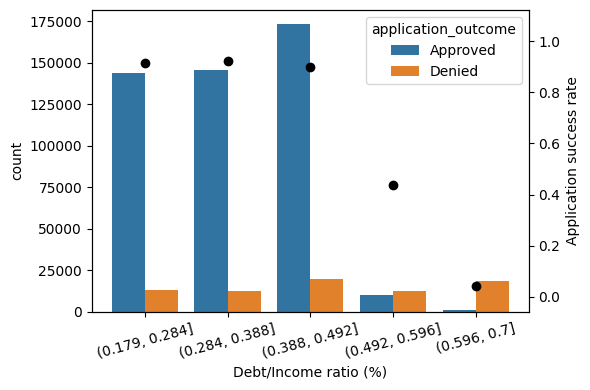

In [10]:
plot_success_numerical(
    df,
    "debt_to_income_ratio",
    "Debt/Income ratio (%)",
    save=True,
)

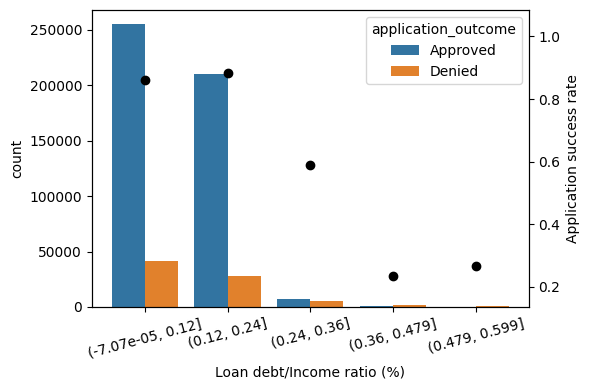

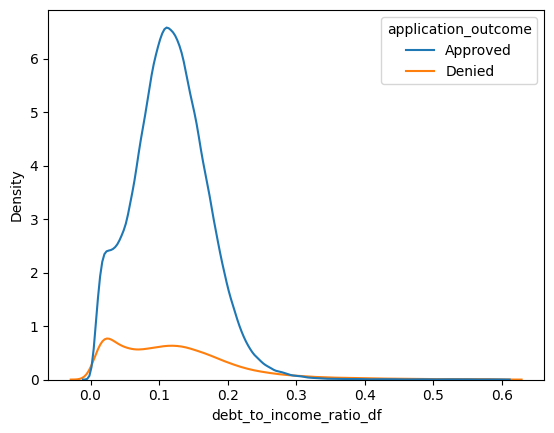

In [9]:
plot_success_numerical(
    df,
    "debt_to_income_ratio_df",
    "Loan debt/Income ratio (%)",
)

sns.kdeplot(df[['debt_to_income_ratio_df']], x='debt_to_income_ratio_df', hue=df['application_outcome'])
plt.show()

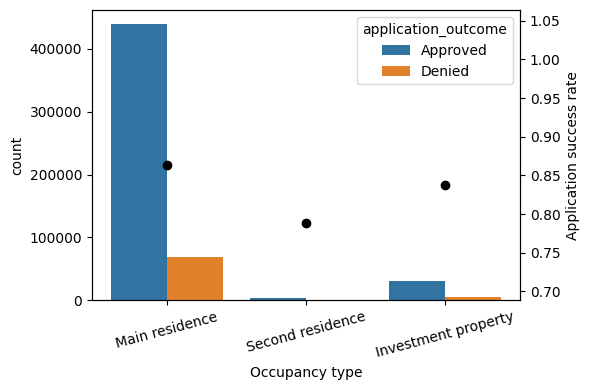

In [10]:
plot_success(df, "occupancy_type", "Occupancy type")

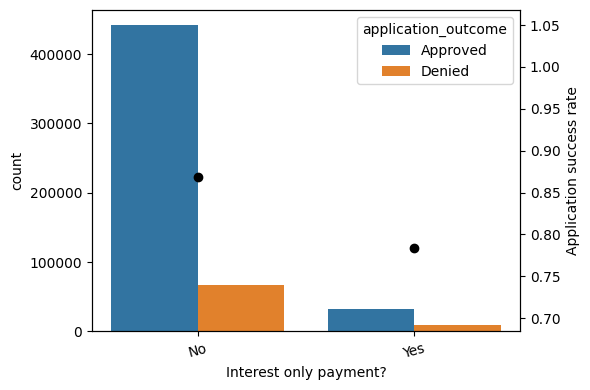

In [11]:
plot_success(df, "interest_only_payment", "Interest only payment?")

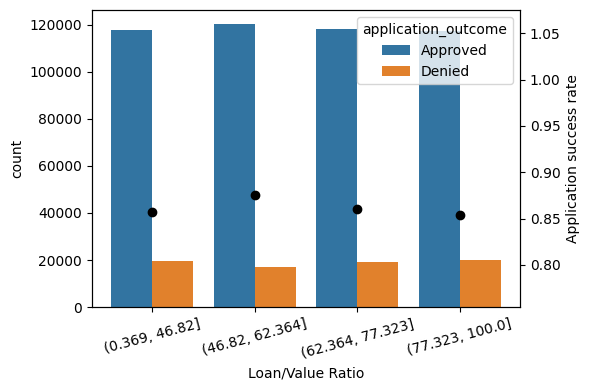

In [11]:
plot_success_numerical(df, "loan_to_value_ratio", "Loan/Value Ratio", bins=4, q=True, save=True)

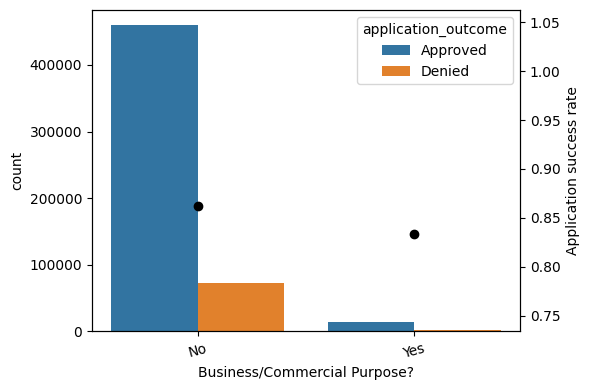

In [13]:
plot_success(df, "business_or_commercial_purpose", "Business/Commercial Purpose?")

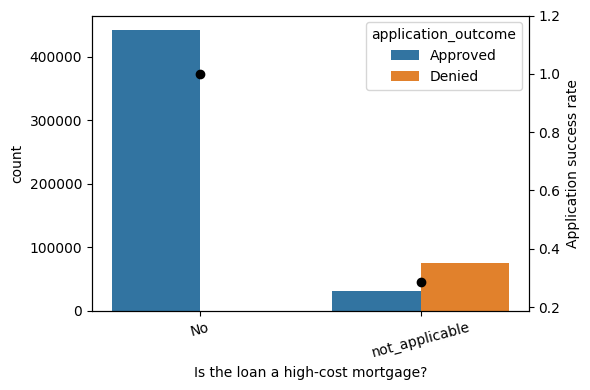

In [12]:
plot_success(df, "hoepa_status", "Is the loan a high-cost mortgage?", save=True)

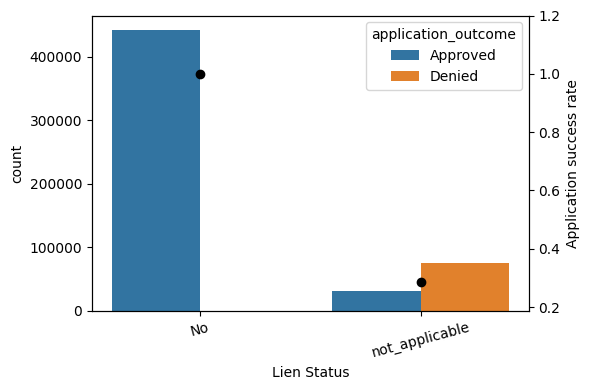

In [15]:
plot_success(df, "hoepa_status", "Lien Status")

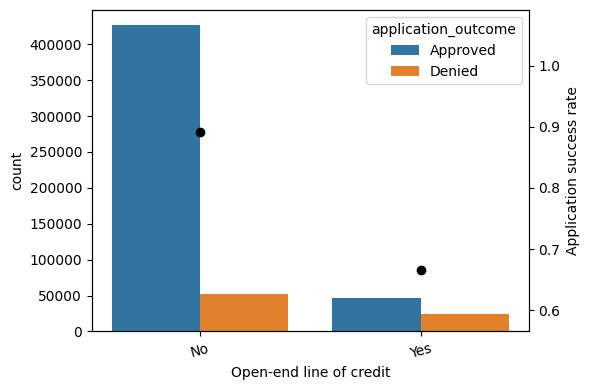

In [16]:
plot_success(df, "open-end_line_of_credit", "Open-end line of credit")

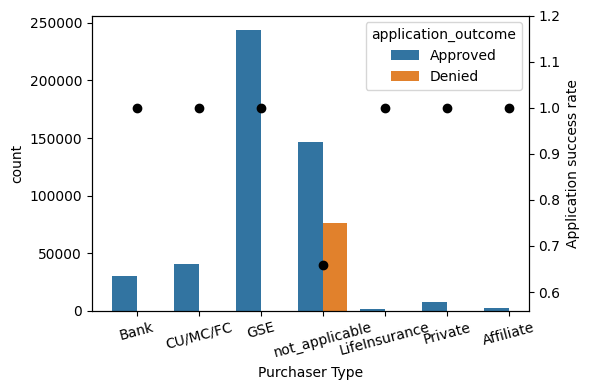

In [13]:
plot_success(df, "purchaser_type", "Purchaser Type", save=True)

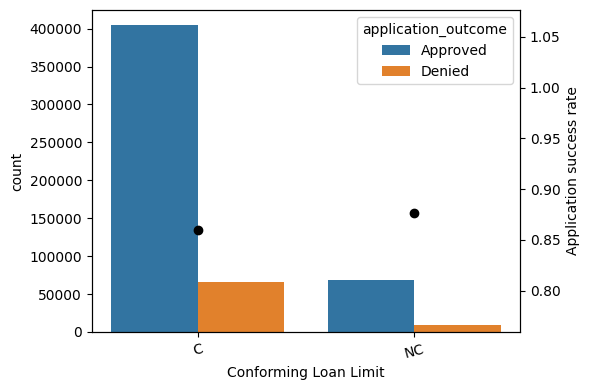

In [18]:
plot_success(df, "conforming_loan_limit", "Conforming Loan Limit")

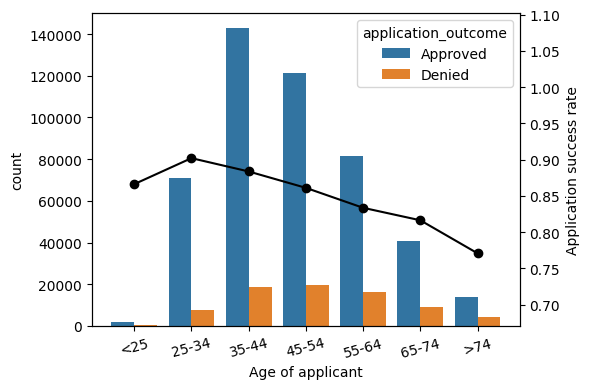

In [14]:
plot_success(
    df,
    "applicant_age",
    "Age of applicant",
    col_order=["<25", "25-34", "35-44", "45-54", "55-64", "65-74", ">74"],
    save=True,
)

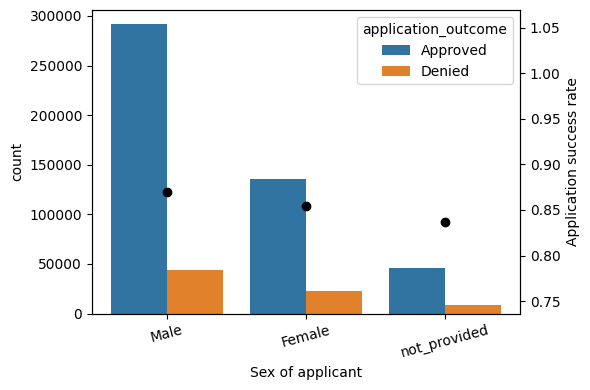

In [15]:
plot_success(df, "applicant_sex", "Sex of applicant", save=True)

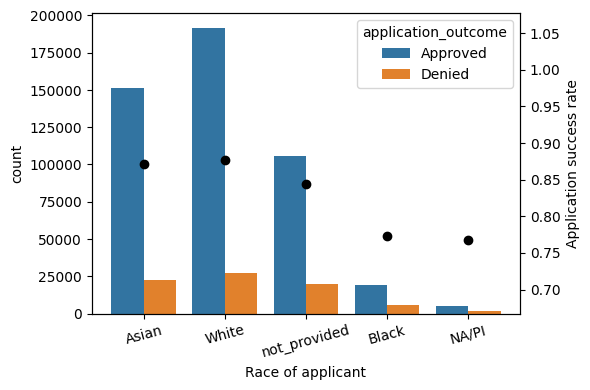

In [16]:
plot_success(
    df,
    "applicant_race",
    "Race of applicant",
    save=True,
)

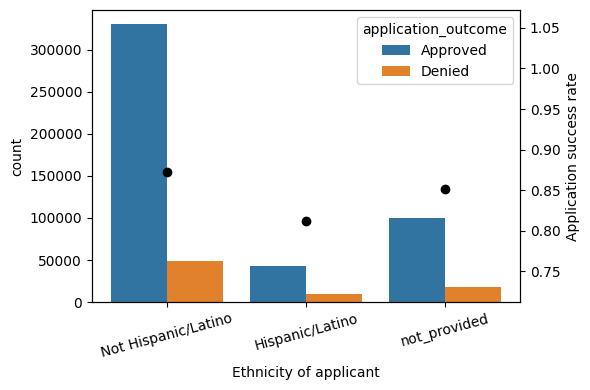

In [17]:
plot_success(df, "applicant_ethnicity", "Ethnicity of applicant", save=True)

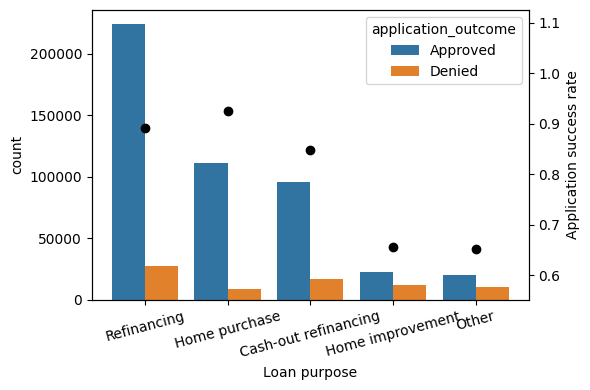

In [18]:
plot_success(df, "loan_purpose", "Loan purpose", save=True)

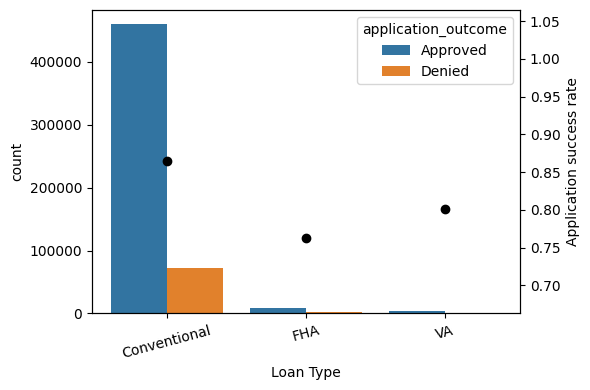

In [24]:
plot_success(df, "loan_type", "Loan Type")

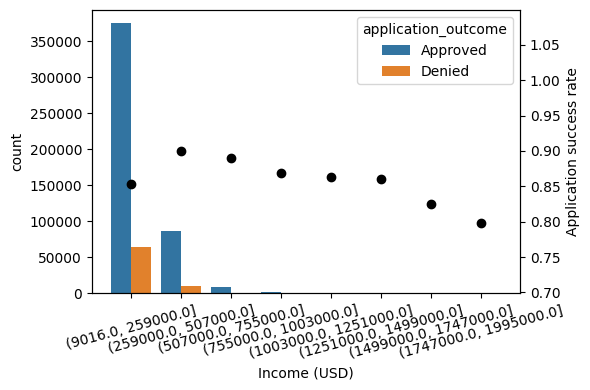

In [19]:
plot_success_numerical(df, "income", "Income (USD)", bins=8, q=False, save=True)

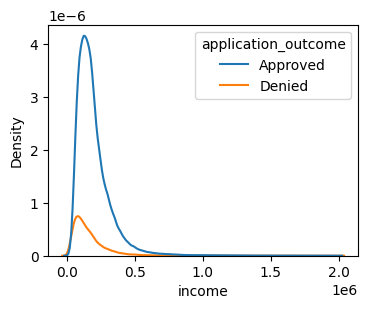

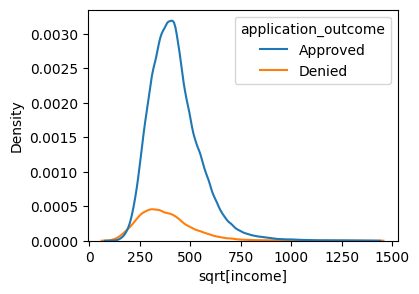

In [26]:
f, ax = plt.subplots(figsize=(4,3))
sns.kdeplot(df[['income']], x='income', hue=df['application_outcome'], ax=ax)
plt.show()

f, ax = plt.subplots(figsize=(4,3))
sns.kdeplot(df[['income']].apply(np.sqrt), x='income', hue=df['application_outcome'], ax=ax)
plt.xlabel('sqrt[income]')
plt.show()

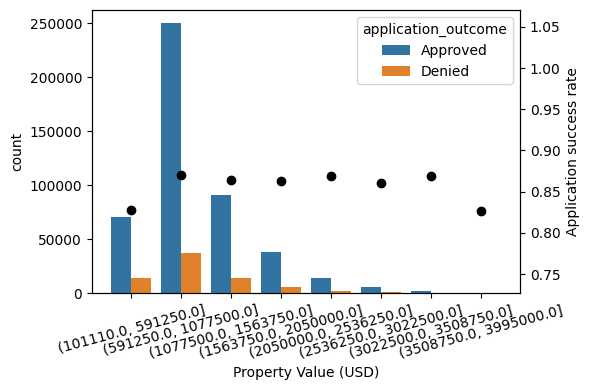

In [20]:
plot_success_numerical(df, "property_value", "Property Value (USD)", bins=8, q=False, save=True)

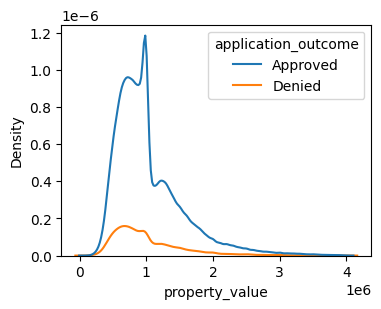

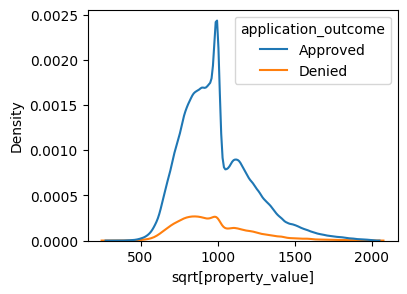

In [28]:
f, ax = plt.subplots(figsize=(4,3))
sns.kdeplot(df[['property_value']], x='property_value', hue=df['application_outcome'], ax=ax)
plt.show()

f, ax = plt.subplots(figsize=(4,3))
sns.kdeplot(df[['property_value']].apply(np.sqrt), x='property_value', hue=df['application_outcome'], ax=ax)
plt.xlabel('sqrt[property_value]')
plt.show()

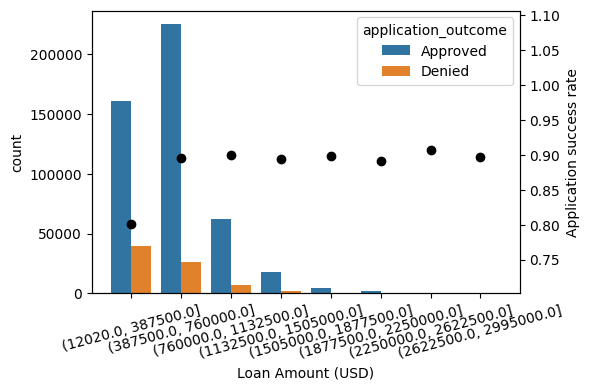

In [21]:
plot_success_numerical(df, "loan_amount", "Loan Amount (USD)", bins=8, q=False, save=True)

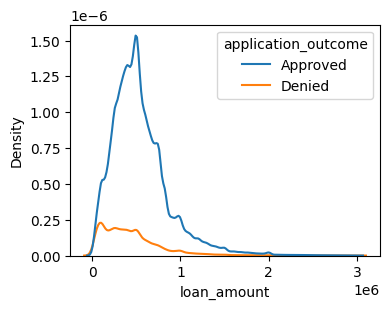

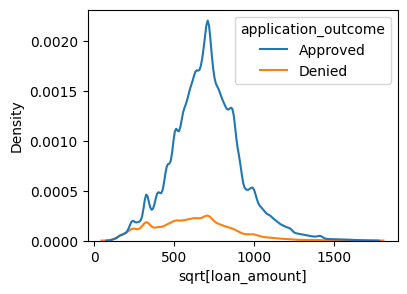

In [30]:
f, ax = plt.subplots(figsize=(4,3))
sns.kdeplot(df[['loan_amount']], x='loan_amount', hue=df['application_outcome'], ax=ax)
plt.show()

f, ax = plt.subplots(figsize=(4,3))
sns.kdeplot(df[['loan_amount']].apply(np.sqrt), x='loan_amount', hue=df['application_outcome'], ax=ax)
plt.xlabel('sqrt[loan_amount]')
plt.show()

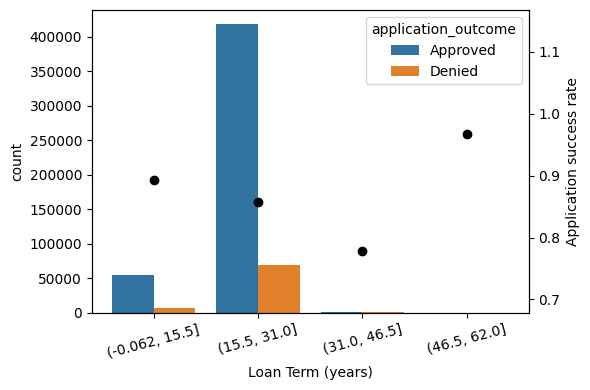

In [31]:
tdf = df[["loan_term", "application_outcome"]].copy()
tdf["loan_term"] = np.array([int(x) for x in tdf.loc[:, "loan_term"].values])
tdf["loan_term"].value_counts()
plot_success_numerical(tdf, "loan_term", "Loan Term (years)", bins=4, q=False)

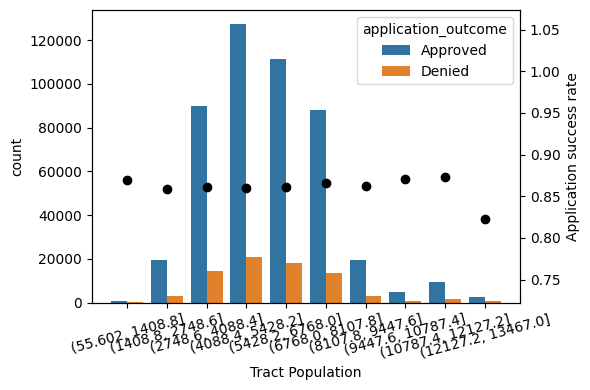

In [32]:
plot_success_numerical(df, "tract_population", "Tract Population", bins=10)

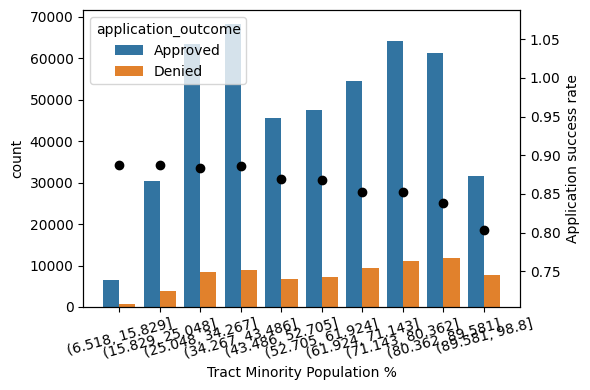

In [22]:
plot_success_numerical(
    df, "tract_minority_population_percent", "Tract Minority Population %", bins=10,
    save=True,
)

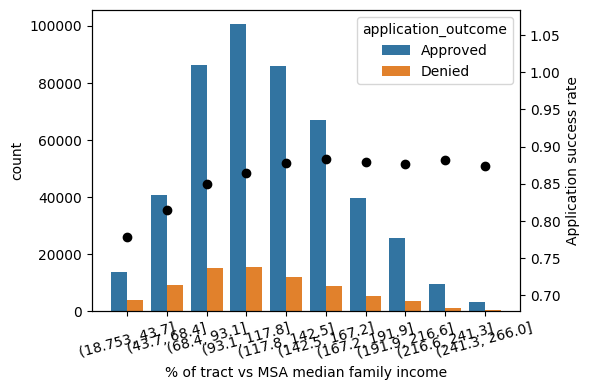

In [23]:
plot_success_numerical(
    df, "tract_to_msa_income_percentage", "% of tract vs MSA median family income", bins=10, save=True,
)

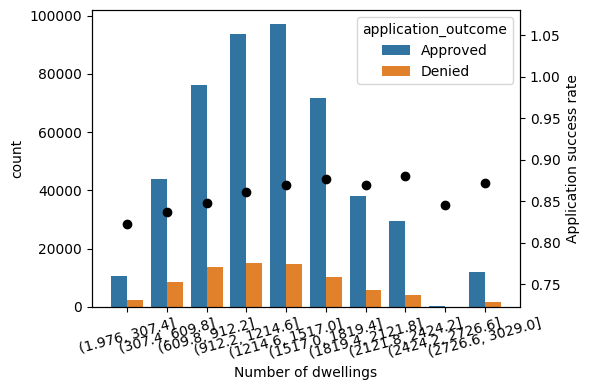

In [35]:
plot_success_numerical(
    df, "tract_owner_occupied_units", "Number of dwellings", bins=10
)

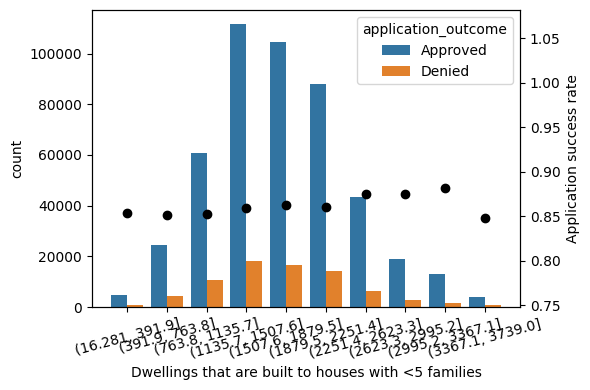

In [36]:
plot_success_numerical(
    df, "tract_one_to_four_family_homes", "Dwellings that are built to houses with <5 families", bins=10
)

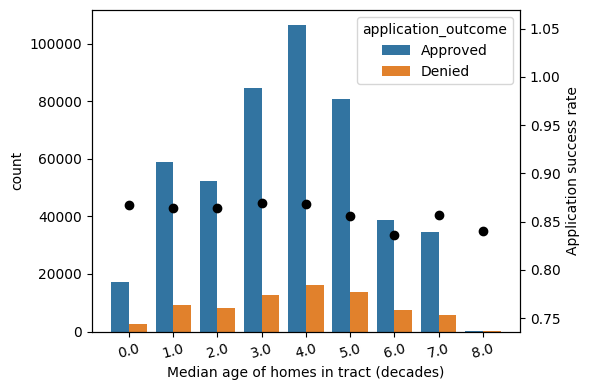

In [37]:
tdf = df[["tract_median_age_of_housing_units", "application_outcome"]].copy()
tdf["tract_median_age_of_housing_units"] = [x for x in tdf["tract_median_age_of_housing_units"].values]
plot_success(
    tdf, "tract_median_age_of_housing_units", "Median age of homes in tract (decades)",
)

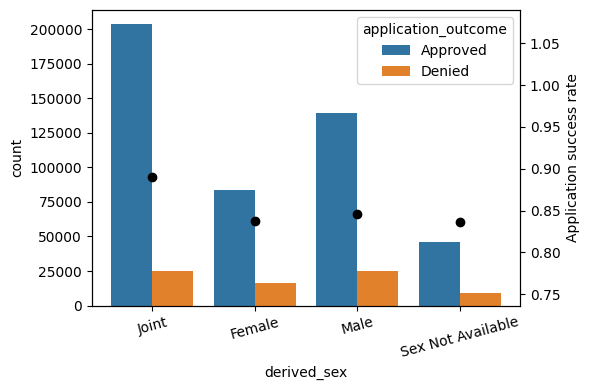

In [24]:
plot_success(df, 'derived_sex', xlabel='derived_sex', save=True)

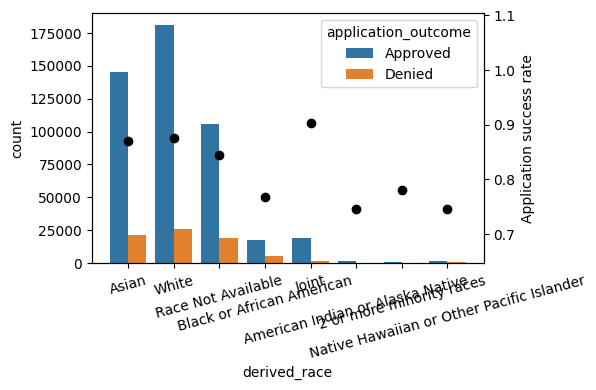

In [39]:
plot_success(df, 'derived_race', xlabel='derived_race')

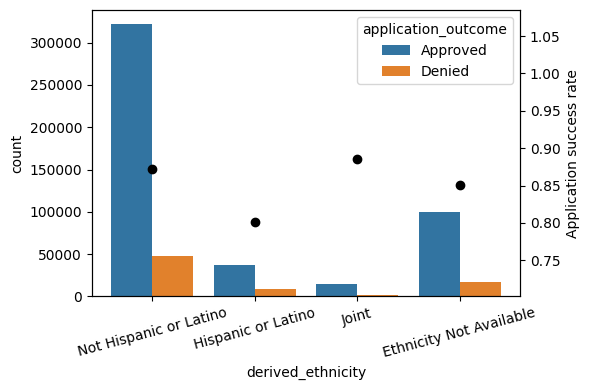

In [40]:
plot_success(df, 'derived_ethnicity', xlabel='derived_ethnicity')

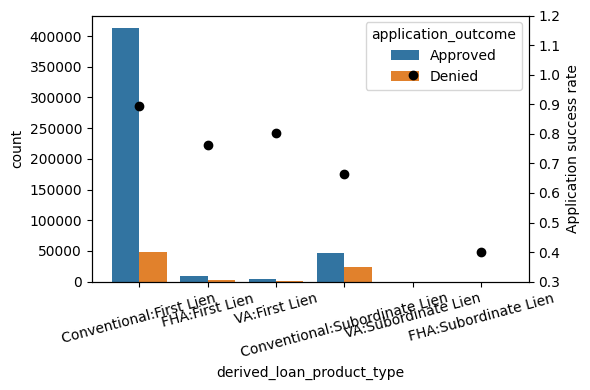

In [41]:
plot_success(df, 'derived_loan_product_type', xlabel='derived_loan_product_type')

### Correlation

In [35]:
corr_map = df.select_dtypes(float).copy()
corr_map['outcome'] = df['application_outcome'].map({'Approved': 1, 'Denied': 0})
corr_map = corr_map.corr().abs()

upper = corr_map.where(np.triu(np.ones(corr_map.shape), k=1).astype(bool))
[column for column in upper.columns if any(upper[column] > 0.70)]

['tract_one_to_four_family_homes', 'tract_owner_occupied_units']

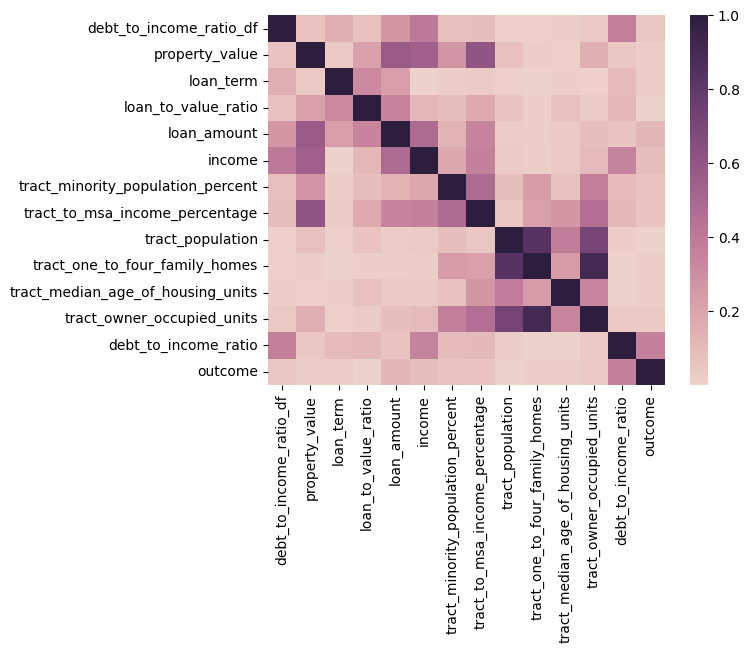

In [32]:
sns.heatmap(corr_map, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Crosstabulation

In [43]:
def crosstab_and_chi2(A, B):
    crosstab = pd.crosstab(index=A, columns=B)
    chi2 = chi2_contingency(crosstab)

    display(crosstab)
    print(f'{A.name} p-value={chi2[1]}')

In [44]:
for col in df.select_dtypes(object).columns.tolist():
    crosstab_and_chi2(df[col], df['application_outcome'])

application_outcome,Approved,Denied
applicant_age_above_62,,
No,399155,58487
Yes,74163,17458


applicant_age_above_62 p-value=0.0


application_outcome,Approved,Denied
denial_reason,,
Collateral,0,6531
Collateral;Credit application incomplete,0,68
Collateral;Credit application incomplete;Debt-to-income ratio,0,1
Collateral;Credit application incomplete;Other,0,6
Collateral;Credit history,0,36
...,...,...
Unverifiable information;Other,0,192
Unverifiable information;Other;Collateral,0,1
Unverifiable information;Other;Employment history,0,1


denial_reason p-value=0.0


application_outcome,Approved,Denied
applicant_race,,
Asian,151601,22381
Black,19154,5608
NA/PI,4849,1471
White,191744,26942
not_provided,105970,19543


applicant_race p-value=0.0


application_outcome,Approved,Denied
coapplicant_age,,
25-34,41604,3917
35-44,73560,8077
45-54,58938,7824
55-64,40913,6477
65-74,22049,3664
<25,1345,242
>74,6439,1396
no_coapplicant,228470,44348


coapplicant_age p-value=0.0


application_outcome,Approved,Denied
coapplicant_race,,
Asian,73565,9856
Black,6340,1411
NA/PI,2455,520
White,102540,11232
no_coapplicant,228469,44341
not_provided,59949,8585


coapplicant_race p-value=0.0


application_outcome,Approved,Denied
applicant_age,,
25-34,70877,7694
35-44,142998,18817
45-54,121462,19587
55-64,81376,16238
65-74,40730,9157
<25,1852,286
>74,14023,4166


applicant_age p-value=0.0


application_outcome,Approved,Denied
applicant_ethnicity,,
Hispanic/Latino,42762,9883
Not Hispanic/Latino,330453,48559
not_provided,100103,17503


applicant_ethnicity p-value=0.0


application_outcome,Approved,Denied
coapplicant_sex,,
Female,159175,19627
Male,58914,7975
no_coapplicant,228482,44341
not_provided,26747,4002


coapplicant_sex p-value=0.0


application_outcome,Approved,Denied
conforming_loan_limit,,
C,404390,66219
NC,68928,9726


conforming_loan_limit p-value=1.2693040724679915e-37


application_outcome,Approved,Denied
coapplicant_ethnicity,,
Hispanic/Latino,22300,3886
Not Hispanic/Latino,165688,19957
no_coapplicant,228419,44340
not_provided,56911,7762


coapplicant_ethnicity p-value=0.0


application_outcome,Approved,Denied
interest_only_payment,,
No,441406,67156
Yes,31912,8789


interest_only_payment p-value=0.0


application_outcome,Approved,Denied
hoepa_status,,
No,442732,0
not_applicable,30586,75945


hoepa_status p-value=0.0


application_outcome,Approved,Denied
business_or_commercial_purpose,,
No,459342,73159
Yes,13976,2786


business_or_commercial_purpose p-value=2.0994067592464908e-26


application_outcome,Approved,Denied
open-end_line_of_credit,,
No,426282,52304
Yes,47036,23641


open-end_line_of_credit p-value=0.0


application_outcome,Approved,Denied
lien_status,,
First,426965,52331
Subordinate,46353,23614


lien_status p-value=0.0


application_outcome,Approved,Denied
loan_purpose,,
Cash-out refinancing,95682,17056
Home improvement,22517,11828
Home purchase,111120,8973
Other,19754,10566
Refinancing,224245,27522


loan_purpose p-value=0.0


application_outcome,Approved,Denied
loan_type,,
Conventional,459150,71834
FHA,9490,2953
VA,4678,1158


loan_type p-value=2.4944124902340952e-270


application_outcome,Approved,Denied
purchaser_type,,
Affiliate,2312,0
Bank,30491,0
CU/MC/FC,40447,0
GSE,244182,0
LifeInsurance,1400,0
Private,7559,0
not_applicable,146927,75945


purchaser_type p-value=0.0


application_outcome,Approved,Denied
application_outcome,,
Approved,473318,0
Denied,0,75945


application_outcome p-value=0.0


application_outcome,Approved,Denied
derived_sex,,
Female,83817,16302
Joint,203740,25234
Male,139527,25366
Sex Not Available,46234,9043


derived_sex p-value=0.0


application_outcome,Approved,Denied
derived_race,,
2 or more minority races,1160,327
American Indian or Alaska Native,1523,517
Asian,145306,21702
Black or African American,17701,5382
Joint,19127,2052
Native Hawaiian or Other Pacific Islander,1996,678
Race Not Available,105970,19543
White,180535,25744


derived_race p-value=0.0


application_outcome,Approved,Denied
derived_ethnicity,,
Ethnicity Not Available,100103,17503
Hispanic or Latino,36581,9054
Joint,14158,1840
Not Hispanic or Latino,322476,47548


derived_ethnicity p-value=0.0


application_outcome,Approved,Denied
derived_loan_product_type,,
Conventional:First Lien,412802,48226
Conventional:Subordinate Lien,46348,23608
FHA:First Lien,9486,2947
FHA:Subordinate Lien,4,6
VA:First Lien,4677,1158
VA:Subordinate Lien,1,0


derived_loan_product_type p-value=0.0


application_outcome,Approved,Denied
applicant_sex,,
Female,135645,23076
Male,291439,43826
not_provided,46234,9043


applicant_sex p-value=8.228190145308617e-115


application_outcome,Approved,Denied
occupancy_type,,
Investment property,30316,5855
Main residence,439677,69197
Second residence,3325,893


occupancy_type p-value=9.149350277046017e-84


### Final filtering

In [37]:
print(df.shape)

df_new = df.copy()

# df_new = df_new[df_new['occupancy_type'] == 'Main residence']
# df_new = df_new.drop('occupancy_type', axis=1)

# df_new = df_new[df_new['interest_only_payment'] == 'No']
# df_new = df_new.drop('interest_only_payment', axis=1)

# df_new = df_new[df_new['business_or_commercial_purpose'] == 'No']
# df_new = df_new.drop('business_or_commercial_purpose', axis=1)

df_new['purchaser_type'] = df_new['purchaser_type'].apply(lambda x: 'non-entity' if x == 'not_applicable' else 'entity')
df_new = df_new[df_new['purchaser_type'] == 'non-entity']
df_new = df_new.drop('purchaser_type', axis=1)

# df_new = df_new[df_new['applicant_sex'] != 'not_provided']
# df_new = df_new[df_new['applicant_race'] != 'not_provided']
# df_new = df_new[df_new['applicant_ethnicity'] != 'not_provided']
# df_new = df_new[df_new['loan_purpose'] != 'Other']

# df_new = df_new[df_new['loan_type'] == 'Conventional']
# df_new = df_new.drop('loan_type', axis=1)

# df_new = df_new[df_new['loan_term'] <= 31]

df_new = df_new.reset_index(drop=True)

print(df_new.shape)
display(df['application_outcome'].value_counts(normalize=True))
display(df_new['application_outcome'].value_counts(normalize=True))

(549263, 38)
(222872, 37)


application_outcome
Approved    0.861733
Denied      0.138267
Name: proportion, dtype: float64

application_outcome
Approved    0.659244
Denied      0.340756
Name: proportion, dtype: float64

application_outcome
Approved    0.861733
Denied      0.138267
Name: proportion, dtype: float64


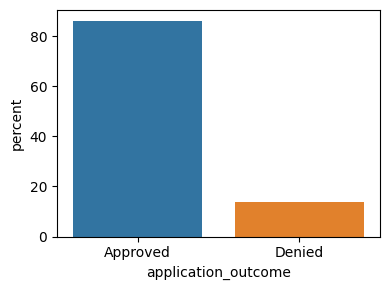

In [47]:
print(f'{df["application_outcome"].value_counts(normalize=True)}')

f, ax = plt.subplots(figsize=(4, 3))
sns.countplot(
    df, x="application_outcome", order=['Approved', 'Denied'], hue_order=['Approved', 'Denied'], stat="percent", hue="application_outcome", ax=ax
)
plt.tight_layout()
plt.savefig('images/target_feature-before_filter.png')
plt.show()

application_outcome
Approved    0.659244
Denied      0.340756
Name: proportion, dtype: float64


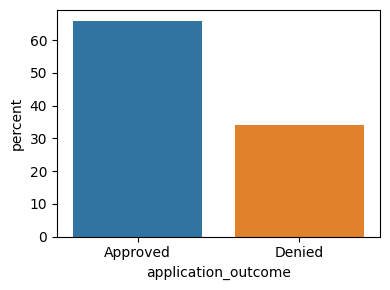

In [46]:
print(f'{df_new["application_outcome"].value_counts(normalize=True)}')

f, ax = plt.subplots(figsize=(4, 3))
sns.countplot(
    df_new, x="application_outcome", order=['Approved', 'Denied'], hue_order=['Approved', 'Denied'], stat="percent", hue="application_outcome", ax=ax
)
plt.tight_layout()
plt.savefig('images/target_feature.png')
plt.show()

### Exporting processed data

In [46]:
df_new.to_csv(f'../../{filename_output}.csv')